In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# Statsmodels.formula.api is a convenience interface for specifying models using formula
# strings and
# Dataframes. The API focuses on models and the most frequently used statistical test, and tools.
# ols: Ordinary Least Squares
# regression : supervised learning
# clustering : unsupervised learning (there are
# inputs but no supervising output; nevertheless we can
# learn relationships and structure from such data.)
# The aim is to build a statistical model for predicting, or estimating, an output based on 
# one or more inputs.
# For each observation of the predictor measurement
# 𝑥i , 𝑖 = 1,…, 𝑛 there is an associated response
# measurement 𝑦i.

## Dataset Import and Preparation

In [33]:
df_housing = pd.read_csv("Housing.csv", na_values='?') 
#print(pd.isnull(df_housing).any(axis=0))

print(df_housing.isnull().sum())

#Drop any not applicable values from the dataset (if there exists)
df_housing = df_housing.dropna()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


## Regression

- We want to perform a multiple linear regression that regresses `MEDV` on `CRIM` (per capita crime rate by town), `RM` (average number of rooms per dwelling), `NOX` (nitric oxides concentration; parts per 10 million), `DIS` (weighted distances to five Boston employment centres), and `AGE` (proportion of owner- occupied units built prior to 1940). We save the model as `res_1`.
- `print` the results of the regression `res_1` to the console (including a regression table and reporting of F-values).

In [34]:
mod_1 = smf.ols('MEDV ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) # Define model
res_1 = mod_1.fit() # Fit using OLS
print(res_1.summary()) # Print full summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           5.02e-95
Time:                        20:41:48   Log-Likelihood:                -1613.2
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2273      4.015     -1.551      0.1

- The value (price) of the house (median value of owner-occupied homes, MEDV) is our target variable, which will be predicted by a Linear Regression model with multiple predictors:
MEDV = 𝛽0 + 𝛽1*CRIM + 𝛽2*RM + 𝛽3*NOX + 𝛽4*DIS + 𝛽5*AGE + 𝜖; Where the intercept 𝛽0 is -6.2273 (the expected value of MEDV when all predictors are zero), and the corresponding p-value is around 0.122 (i.e., it is not significant). The slope 𝛽1 = -0.2081 describes the average decreae (negative value) in MEDV associated with a one-unit increase in  CRIM). The coeff (𝛽2) for RM is 7.7353: holding all other predictors fixed, spending an additional one on average number of rooms (RM) per dwelling leads to an increse in value by approximately 7.74 units. The coefficient (𝛽4) for Proportion of owner-occupied units built prior to 1940 (AGE) is close to zero.
- The Prob(Omnibus) is zero, so the assumptions of OLS which is the errors are normally distributed, cannot be satisfied. We can see that the Prob(Jarque-Bera, JB) is a large value of 1646.3, which means the errors are not normally distributed.
- A significant regression equation was found (F-statistic(5, 500) = 145.3, p < .001), with an R-squared of 0.592. According to p-values, all predictor variables included in the model are significant at the 0.05 level.
- R-squared (i.e., percentage variation in MEDV that is explained by independent variables) is 59.2% variation.
-  Assumption H0 (H0: 𝛽0 = 𝛽1 = ... = 𝛽p = 0: there is no relationship). Here, F-statistic is 145.3, so there is a significant regression between MEDV and inputs; so at least one coefficient 𝛽 is nonzero.

- We add a new categorical column to `df_housing` called `NOXCAT`. This column categorizes the suburbs into towns with `LOW`, `MEDIUM`, and `HIGH` nitric oxides concentration (based on the variable `NOX`). The categorization should be based on quantiles of `NOX` as follows:
    - LOW (NOX <= 30% quantile)
    - MEDIUM (> 30% quantile; <= 70% quantile)
    - HIGH (> 70% quantile).
- We create a boxplot that shows `MEDV` for the different values of `NOXCAT` (`LOW`, `MEDIUM`, `HIGH`). We use appropriate titels for the plot and its axes.

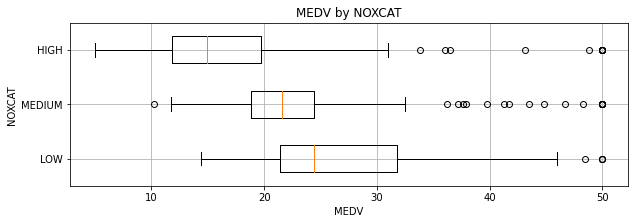

In [35]:
# Quantiles are points in a distribution that relates to the rank order of values in that distribution.
# For example, the middle quantile or 50th percentile is the middle value of the sorted sample (median)
# For example, quantile 0.30 or 30th percentile, returns a value for NOX variable, such that the 
# probability that a random observation of the NOX variable is less than that value is 30% chance.
NOX_q_30 = np.quantile(df_housing['NOX'],0.3)
NOX_q_70 = np.quantile(df_housing['NOX'],0.7)
#category
# pd.cut(x,bins,right,labels): Distribute NOX values of df_housing dataframe into bins and assign
# a label to each bin
# First see the following example!
df_housing['NOXCAT'] = pd.cut(df_housing['NOX'],[0,NOX_q_30,NOX_q_70,1],right=True,labels = ['LOW','MEDIUM','HIGH'])
#create a boxplot
plotlabels = ['LOW','MEDIUM','HIGH']
plotdata = [df_housing[df_housing['NOXCAT']==label]['MEDV'] for label in plotlabels]
plt.figure(figsize=(10, 3)) # Specify figure size
plt.boxplot(plotdata, labels=plotlabels, vert=False, widths=0.5, zorder=3) # Box plot
plt.xlabel('MEDV') # Set the label for the x axis
plt.ylabel('NOXCAT') # Set the label for the y axis
plt.title('MEDV by NOXCAT') # Set the figure title
plt.grid(zorder=0) # Add grid
plt.show()
# Following is an example for the function Pandas.cut

In [36]:
# Pandas.cut function is used to separate the array elements into different bins.
# Example to distribute column values of a dataframe into bins using pd.cut and label them
df_example = pd.DataFrame({
    'Name': ["Anish","Birat","Chirag","Kabin","Sachin"],
    'Age':  [23,34,38,45,27],
    'Score': [316, 322, 332, 330,325],
})
print("Initial DataFrame:")
print(df_example,"\n")
df_example['Age-Range'] = pd.cut(x=df_example['Age'], bins=[20,30,40,50])
print("DataFrame with Age-Range:")
print(df_example)
# It separates the values of the Age column in the DataFrame df into the age ranges computed using 
# the value of bins argument in the pandas.cut() method and finally displays DataFrame with Age-Range 
# value for each row.

Initial DataFrame:
     Name  Age  Score
0   Anish   23    316
1   Birat   34    322
2  Chirag   38    332
3   Kabin   45    330
4  Sachin   27    325 

DataFrame with Age-Range:
     Name  Age  Score Age-Range
0   Anish   23    316  (20, 30]
1   Birat   34    322  (30, 40]
2  Chirag   38    332  (30, 40]
3   Kabin   45    330  (40, 50]
4  Sachin   27    325  (20, 30]


The newly created column `NOXCAT` in `df_housing` is a categorical column with three possible values (`LOW`, `MEDIUM`, and `HIGH`). 
- We create a set of dummy variables (for different values of `NOXCAT`).
- We regress `MEDV` on the different `NOX` categories using the dummy variables. We choose the dummy variable coding in your regression such that the intercept reflects the `MEDV` value of suburbs in the `MEDIUM` category. We save the regression result as `res_2` and `print` the regression result to the console.
- We report the regression results from `res_2` in your own words according to APA style and interpret the coefficients.

In [37]:
# TODO: Add your solution (Python code) in this cell.
df_housing = df_housing.join(pd.get_dummies(df_housing['NOXCAT']))
# Following is an example for join function
# join() makes all items and joins them into one string

mod_2 = smf.ols('MEDV ~ LOW + MEDIUM', data=df_housing) # Define model
res_2 = mod_2.fit() # Fit using OLS
print(res_2.summary()) # Print a full model summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     49.55
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.27e-20
Time:                        20:41:50   Log-Likelihood:                -1794.7
No. Observations:                 506   AIC:                             3595.
Df Residuals:                     503   BIC:                             3608.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2881      0.685     25.222      0.0

In [38]:
# Example for join
lst = ['a', 'b']
text = ' '.join(lst)
text
# ' ' is the separator parameter in the join function

'a b'

- The target is to precit MEDV based on NOXCAT (NOXCAT is distributed on NOX's low and medium categories) using a multiple linear regression
MEDV = 𝛽0 + 𝛽1*Low NOXCAT + 𝛽2*Medium NOXCAT + 𝜖; Where the intercept 𝛽0 is 17.2881 (the expected value of MEDV when all predictors are zero). The slope 𝛽1 = 9.4848 describes the average increase (positive value) in MEDV associated with a one-unit increase in Low NOXCAT. The coeff (𝛽2) for Medium NOXCAT is 5.9184: holding all other predictors fixed, spending an additional one on Medium NOXCAT leads to an increse in value by approximately 5.9184 units.
- A high significant regression equation was found (F-statistic(2, 503) = 49.55, p = 2.27e-20
< .001), with an R-squared of 0.165. According to p-values, all predictor variables included in the model are significant at the 0.05 level.
- R-squared (i.e., percentage variation in MEDV that is explained by independent variables) is 16.5% variation. (16.5% of variations in MEDV can be described by independent variables)
-  Assumption H0 (H0: 𝛽0 = 𝛽1 = 0: there is no relationship). Here, F-statistic is 49.55, so there is a significant regression between MEDV and independant variables; so at least one coefficient 𝛽 is nonzero.

## Classification

- We create a new numerical column called `MEDVBIN` in `df_housing`. The column takes on the value `1` if `MEDV` is greater than the median of `MEDV`. Otherwise, it takes on the value `0`.
- We perform a logistic regression that regresses the newly created column `MEDVBIN` on `CRIM`, `RM`, `NOX`, `DIS` and `AGE` in order to predict the probability that a house has a high `MEDV`. We save the regression results as `res_3` and `print` the results to the console.
- We report the results of the logistic regression `res_3` in APA style, including reporting of AIC, and then interpret the coefficients in your own words. How are this regression and its results different from `res_1` done in previous part.

In [39]:
# Classification involves assigning the observation to a category, or class.
# The models we use for classificatio: 1. logistic regression, 2. linear discriminant analysis, 
# 3. k-nearest neighbours, 4. decision trees, 5. support vector machines 
MEDV_MEDIUM = np.median(df_housing['MEDV'])
df_housing['MEDVBIN'] = df_housing['MEDV'].apply(lambda x: np.where(x > MEDV_MEDIUM, 1, 0))

#print(df_housing)
# Multiple logistic regression
mod_3 = smf.logit('MEDVBIN ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) # Define Logistic model
res_3 = mod_3.fit() # Fit using MLE (maximum likelihood estimation)
print(res_3.summary()) # Print full summary 

print('AIC={:.2f}'.format(res_3.aic))

Optimization terminated successfully.
         Current function value: 0.394887
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                MEDVBIN   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.4302
Time:                        20:41:53   Log-Likelihood:                -199.81
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 4.174e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1635      2.442     -4.162      0.000     -14.950      -5.378
CRIM          -0.1627      0.

- The target is to precit MEDVBIN based on CRIM, RM, NOX, DIS, AGE using a multiple linear logistic regression
MEDVBIN = 𝛽0 + 𝛽1*CRIM + 𝛽2*RM + 𝛽3*NOX + 𝛽4*DIS + 𝛽4*AGE + 𝜖; Where the slope 𝛽1 = -0.1627 describes the average decrease (negative value) in MEDVBIN associated with a one-unit increase in CRIM. The coeff (𝛽2) for RM is 2.7538: holding all other predictors fixed, spending an additional one on RM leads to an increse in value by approximately 2.7538 units.

- We used a multiple linear regression model in previous part to estimate the coefficient. The estimated coefficient describe the mean variety of dependent variable caused by a unit change of independent variables.
- Here, the dependent variable (MEDVBIN) is discrete binary 0 or 1, and we used a multiple logistic regression model as a classifier to estimate the probability that a house has a high MEDV based on crime rate, number of rooms, nitric oxides concentration, distances to employment centres, and building age by estimating the linear determinants of the log odds (or logit). We investigated the case which has the probability = 1. And we used MLE to see how to maximize this probability, the p-value in the result shows us which independent variables have significant impact on this probability and coefficients tell us how they affect the probability.

- Based on the logistic regression model, we want to know how likely is it that this house has a `HIGH` `MEDV`? We use the model coefficient estimates and the corresponding values for the first example to calculate its logit and odds. `print` the logits and odds to the console.
- We want to know what `MEDVBIN` would be predicted for this first example by the model? We look at the actual `MEDVBIN` of this house and describe in your own words how well the model performed in this case.

In [40]:
logits = (df_housing[['CRIM', 'RM', 'NOX', 'DIS', 'AGE']][:1] * res_3.params[1:]).sum(axis=1)[0] + res_3.params['Intercept']
odds=np.exp(logits)
print('The logits = {:.2f} and odds {:.2f} for the first row, respectively.'.format(logits, odds))

The logits = 1.34 and odds 3.82 for the first row, respectively.


- The MEDV is equal to high, as the probability of high MEDV is greater than the probability of low MEDV. The multiple logistic regression model perfomed well, as the actual MEDV is 24 which is higher than the medium.

We would like to know not only how well the logistic regression model `res_3` did for the first example, but for our entire dataset.
- We use `res_3` to predict the probabilities of `MEDVBIN` being `1`, and save them as a new column `MEDVBIN_PROB` in `df_housing`.
- We generate the actual model predictions as a new column `MEDVBIN_PRED` in `df_housing` by setting them to `1` if the predicted probability `MEDVBIN_PROB` is greater than `0.5`, and to `0` otherwise. 
- We create a confusion matrix `conf_mat` for the results generated by `res_3` to tabulate the predictions `MEDVBIN_PRED` and actual values `MEDVBIN`. `print` `conf_mat` to the console.
- Based on `conf_mat`, calculate sensitivity, specificity, and accuracy. `print` these values to the console as a grammatically correct sentence.
- We interpret sensitivity, specificity, and accuracy.

In [41]:
df_housing['MEDVBIN_PROB'] = res_3.predict(df_housing[['CRIM', 'RM', 'NOX', 'DIS', 'AGE']])
df_housing['MEDVBIN_PRED'] = df_housing['MEDVBIN_PROB'].apply(lambda x: np.where(x > 0.5, 1, 0))

conf_mat = pd.crosstab(df_housing['MEDVBIN_PRED'],df_housing['MEDVBIN'],rownames=['Predicted'],colnames=['Actual'],margins=True)
print(conf_mat)
# Sensitivity: True positive rate
accuracy = (conf_mat.loc[1, 1] + conf_mat.loc[0, 0]) / conf_mat.loc['All','All'] 
specificity = conf_mat.loc[0, 0] / conf_mat.loc['All', 0]
sensitivity = conf_mat.loc[1, 1] / conf_mat.loc['All', 1]
print("Accuracy = {:.2f}%; Specificity = {:.2f}%; Sensitivity = {:.2f}%;".format(accuracy*100, specificity*100, sensitivity*100))

Actual       0    1  All
Predicted               
0          218   45  263
1           38  205  243
All        256  250  506
Accuracy = 83.60%; Specificity = 85.16%; Sensitivity = 82.00%;


- Accuracy means how correctly the proportion of being positive among all positive cases has been predicted.
- Specificity means how well our model identifies the negative cases, i.e., the proportion of being negative among all negative cases.
- Sensitivity shows how well the proportion of being positive among all positive cases has been predicted, i.e., how well the model can identify the positive cases.

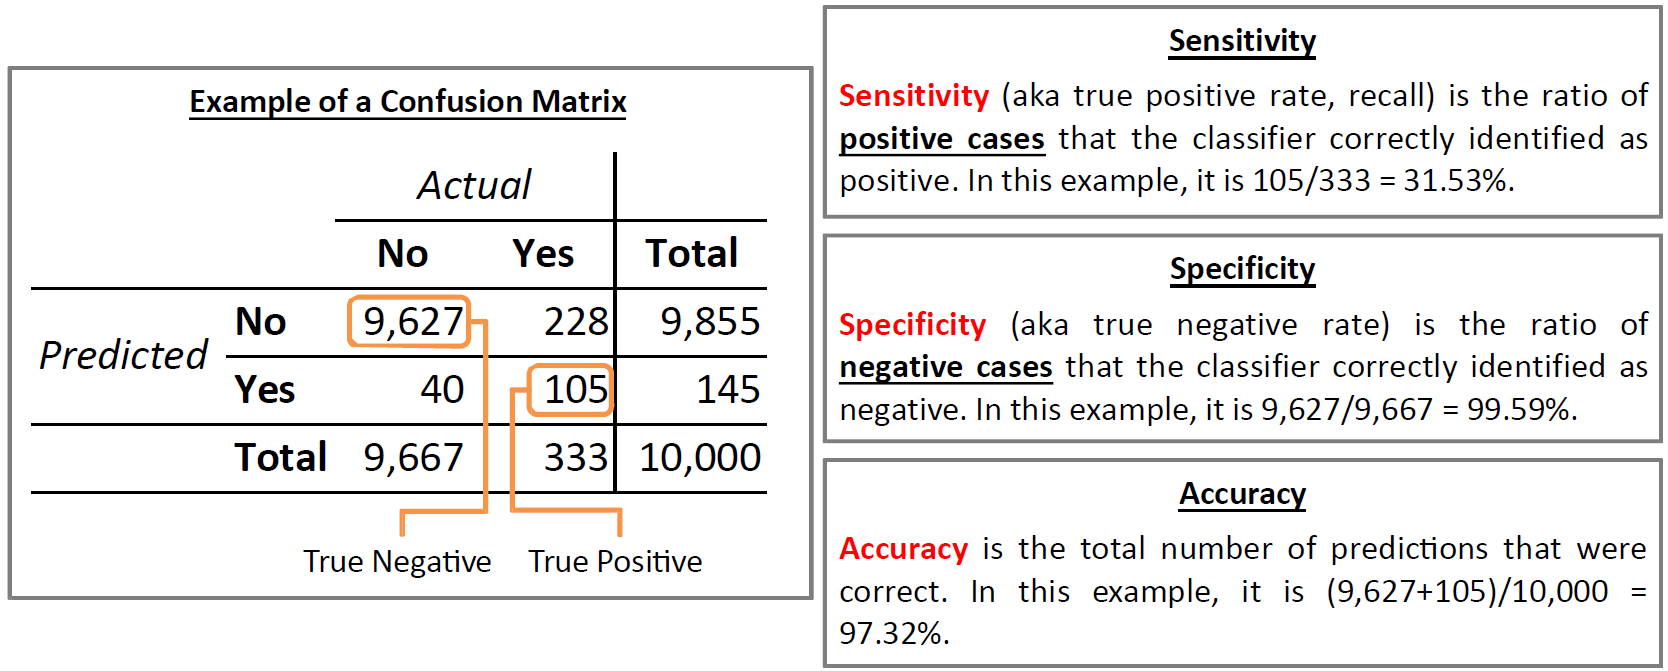